# **ML Project #3: Credit Card Fraud Detection**

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


![Credit Card Sample](https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Credit_card_samp.jpg/960px-Credit_card_samp.jpg)

Hey there, welcome to my ML GitHub's third project!

We are given a dataset (CSV file) and have been asked to build a simple model that, given a anonymous data of credit cards, detects fraudulent actions!

This project consists of 4 core steps, often seen in almost all ML projects:

Import & Load Data
Exploratory Data Analysis
Preprocessing
Model Training + Prediction

Throughout the project you will see several such markdown boxes - they will explain what's gonna happen in the next few cells. But detailed explanation of each cell will be in the comments! Enjoy!

# **1. Import & Load Data**

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **2. Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts() #extremely unbalanced!

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
fraud_ratio = df['Class'].value_counts(normalize=True) * 100
fraud_ratio

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

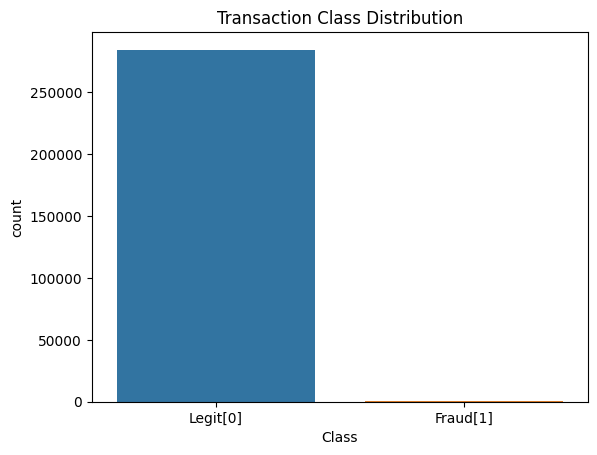

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Class')
plt.title('Transaction Class Distribution')
plt.xticks([0,1], ['Legit[0]', 'Fraud[1]'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


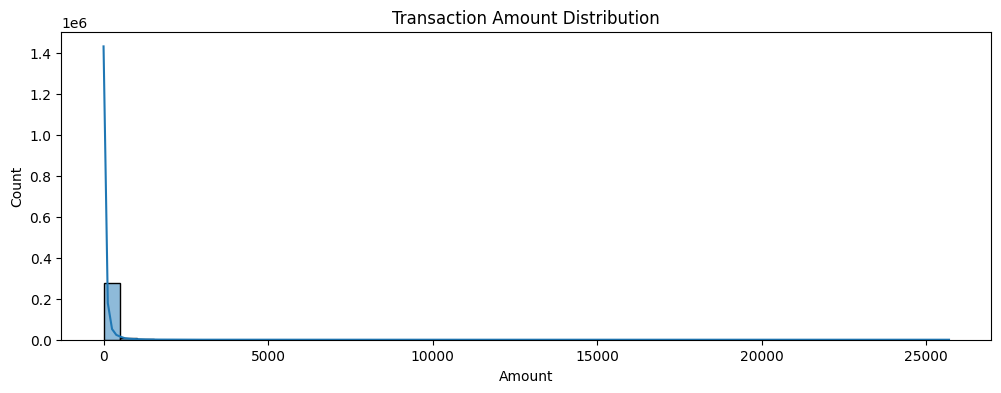

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


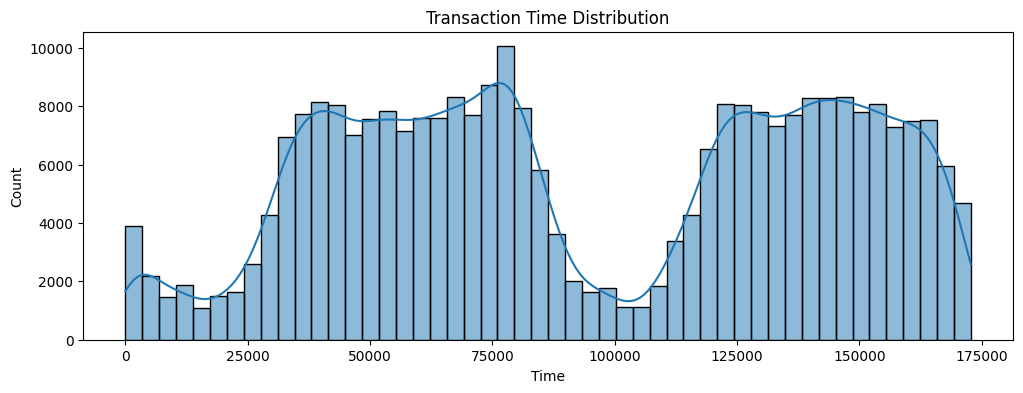

In [16]:
plt.figure(figsize=(12,4))
sns.histplot(df['Amount'], bins = 50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

plt.figure(figsize=(12,4))
sns.histplot(df['Time'], bins = 50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

In [11]:
#feature scaling - this ensures all features are on the same scale
#important for distance based models and gradient descent
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# **3. Preprocessing**

The number one thing we need to do here is handling the class imbalance. The 2 ways of doing this are:

1. Undersampling: reduce legit transactions
2. Oversampling: create synthetic fraud samples

But undersampling throws away 99% of data, and oversampling might lead to overfitting! So we will be testing both methods, and then finally be using the one that gives the best performance!

In [15]:
#option 1: undersampling

fraud_df = df_scaled[df_scaled['Class'] == 1]
legit_df = df_scaled[df_scaled['Class'] == 0]

legit_sampled = legit_df.sample(n=len(fraud_df), random_state = 42)

undersampled_df = pd.concat([legit_sampled, fraud_df])

#for shuffling
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(undersampled_df.shape)
undersampled_df['Class'].value_counts()

(984, 31)


Class
1    492
0    492
Name: count, dtype: int64

In [21]:
!pip uninstall -y imbalanced-learn

Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0


In [24]:
#option 2: oversampling
#from imblearn.over_sampling import SMOTE

#X = df_scaled.drop('Class', axis=1)
#y = df_scaled['Class']

#smote = SMOTE(random_state=42)
#X_smote, y_smote = smote.fit_resample(X, y)

# Confirm it's balanced
#print(pd.Series(y_smote).value_counts())

#ERROR WITH KAGGLE, COULD NOT IMPORT - HAVE TO DO THIS METHOD ANOTHER WAY

In [26]:
#another way of doing oversampling - but this does not create synthetic samples
#it just samples with replacement from the fraud df
#a lot more prone to overfitting, but we don't have an option :(

from sklearn.utils import resample

# Separate majority and minority
df_majority = df_scaled[df_scaled['Class'] == 0]
df_minority = df_scaled[df_scaled['Class'] == 1]

# Oversample frauds (minority class)
df_minority_upsampled = resample(df_minority,
                                 replace=True,                # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class
                                 random_state=42)

# Combine and shuffle
oversampled_df = pd.concat([df_majority, df_minority_upsampled])
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new balance
print(oversampled_df['Class'].value_counts())

Class
1    284315
0    284315
Name: count, dtype: int64


# **4. Model Training & Eval**

In [27]:
#we will train on the oversampled and undersampled datasets, but test on the orignal one! 
#(the one with class imbalance)
from sklearn.model_selection import train_test_split

#features and target
X_over = oversampled_df.drop('Class', axis = 1)
y_over = oversampled_df['Class']

X_test = df_scaled.drop('Class', axis=1)
y_test = df_scaled['Class']

X_train, _, y_train, _ = train_test_split(X_over, y_over, test_size = 0.2, random_state = 42)

In [28]:
#train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

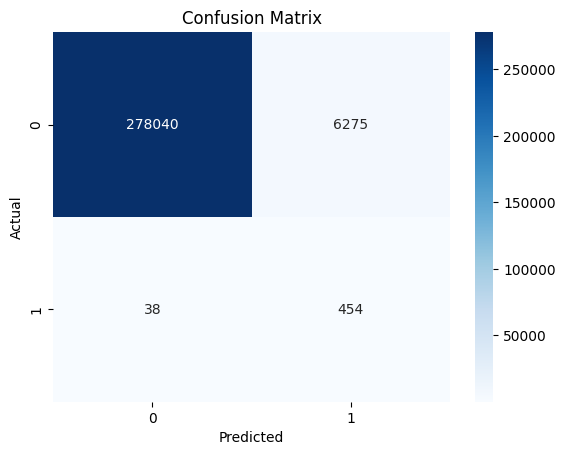

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    284315
           1       0.07      0.92      0.13       492

    accuracy                           0.98    284807
   macro avg       0.53      0.95      0.56    284807
weighted avg       1.00      0.98      0.99    284807

ROC-AUC Score: 0.9872348587369242


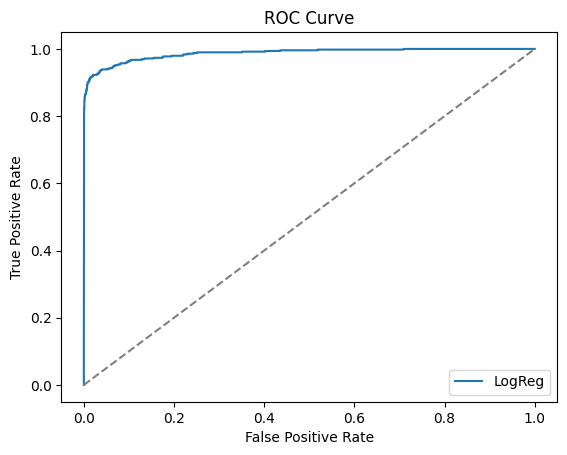

In [29]:
#evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

roc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='LogReg')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit on oversampled data
xgb_clf.fit(X_train, y_train)

# Predict on original (imbalanced) test set
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

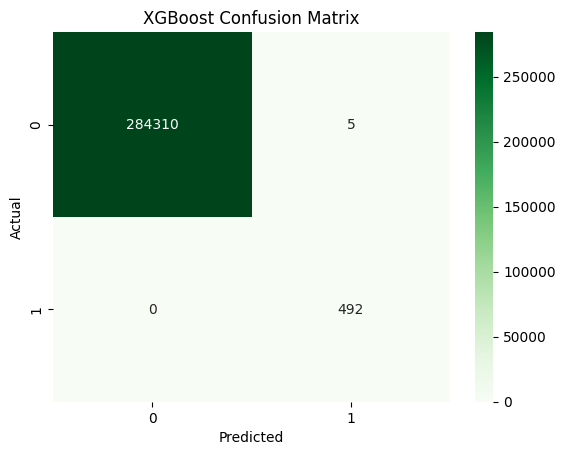

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.99      1.00      0.99       492

    accuracy                           1.00    284807
   macro avg       0.99      1.00      1.00    284807
weighted avg       1.00      1.00      1.00    284807

XGBoost ROC-AUC Score: 0.9999994423910614


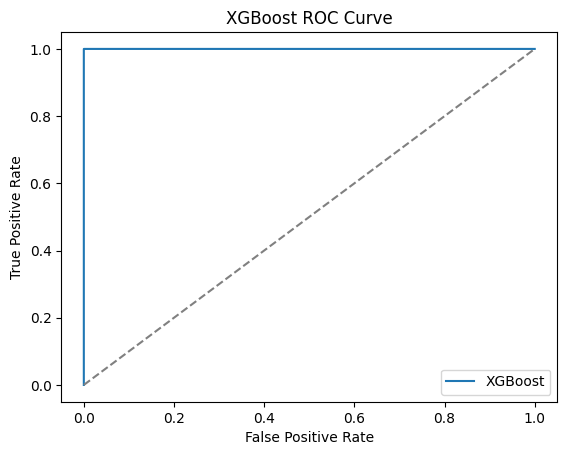

In [32]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC
roc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("XGBoost ROC-AUC Score:", roc_xgb)

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()